In this project, we compare clustering methods on a fish species dataset, a labeled dataset with length, weight, length-weight relationship of 9 species of fish. Labels we will use at the end to evaluate the results.
We apply KMeans, Agglomerative Clustering, DBSCAN, and Gaussian Mixture to identify 9 clusters (9 species of fish) and compare them to the labeled dataset.
In the end, we will decide which method is the most powerful.

In [1]:
# installing libraries and data

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("fish_data.csv")

EDA

In [3]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [5]:
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [6]:
# how many null values
df.isnull().sum().sum()

np.int64(0)

In [7]:
# how many duplicates
df.duplicated().sum()

np.int64(109)

In [8]:
# Remove duplicates from the dataframe
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(3971, 4)

In [10]:
# y - target values, labels
X = df.drop('species', axis=1)
y = df.species

In [11]:
# finding outliers
# standardization for each column
z_scores = pd.DataFrame(stats.zscore(X))
# descriptive statistics for z-scores
display(z_scores.describe().round(3))
# If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. 
# Such a data point can be an outlier.

,length,weight,w_l_ratio
count,3971.000,3971.000,3971.000
mean,-0.000,-0.000,-0.000
std,1.000,1.000,1.000
min,-1.554,-1.629,-1.404
25%,-0.846,-0.639,-0.670
50%,0.003,-0.407,-0.507
75%,0.736,0.350,0.717
max,2.339,2.485,3.163


Conclusions:
- dataset is clean
- there are no missing values
- dataset includes 3 numerical feature columns
- there are 109 dublicates, we dropped them
- there are no outliers

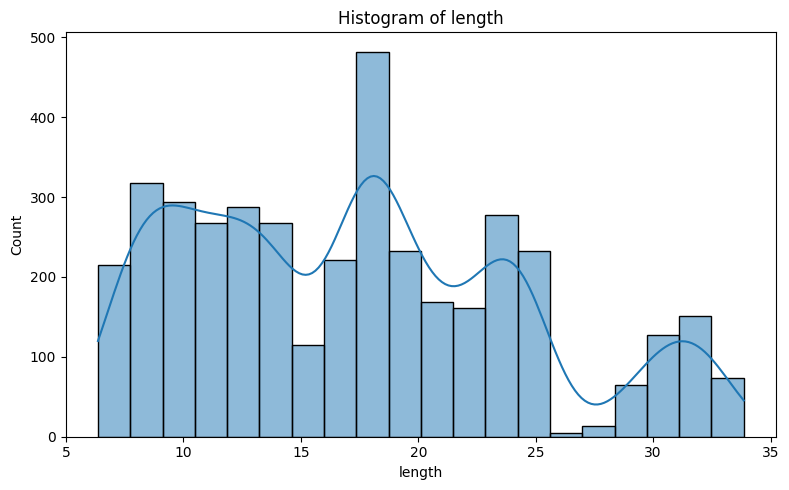

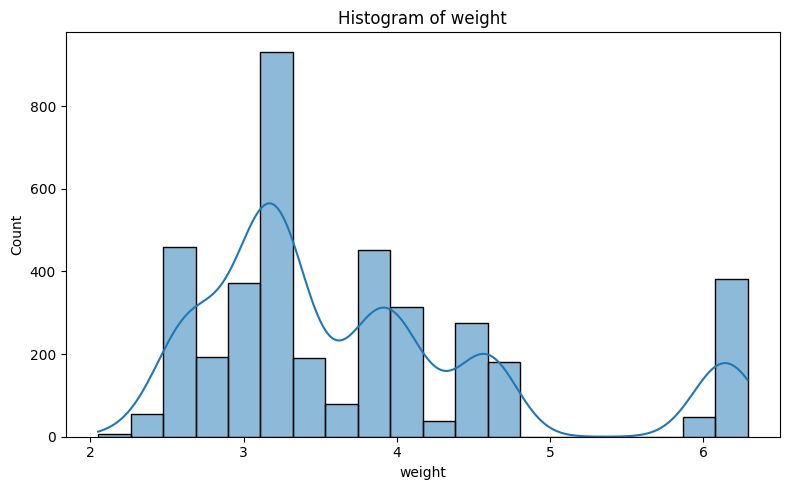

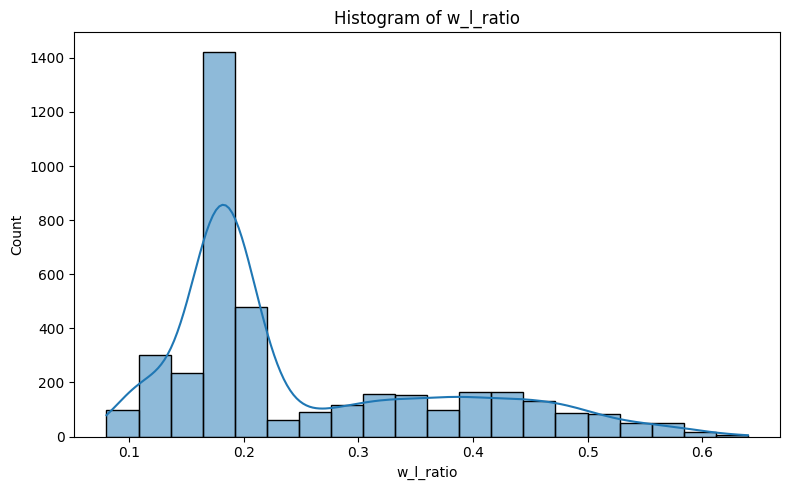

In [12]:
# histograms for each column
for column in X:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()

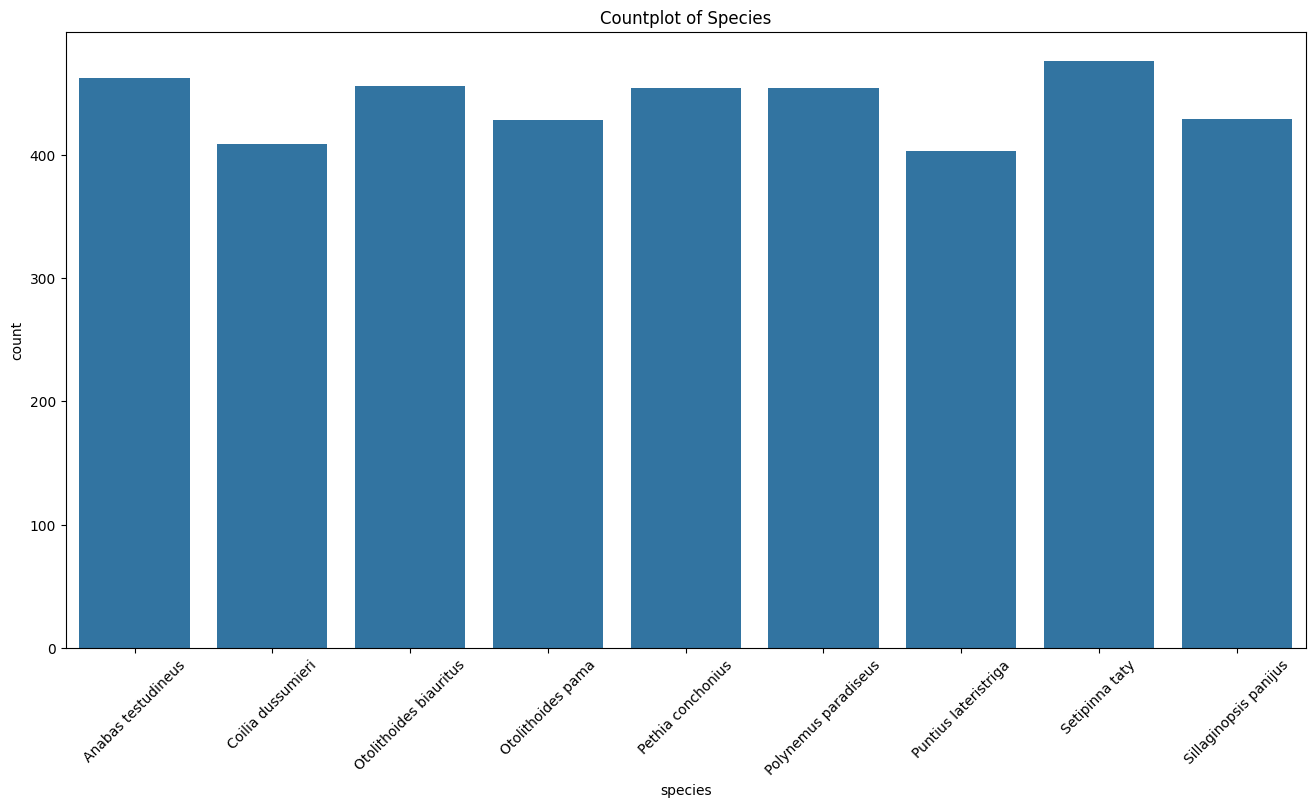

In [13]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='species')
plt.title(f'Countplot of Species')
plt.xticks(rotation=45)
plt.show()

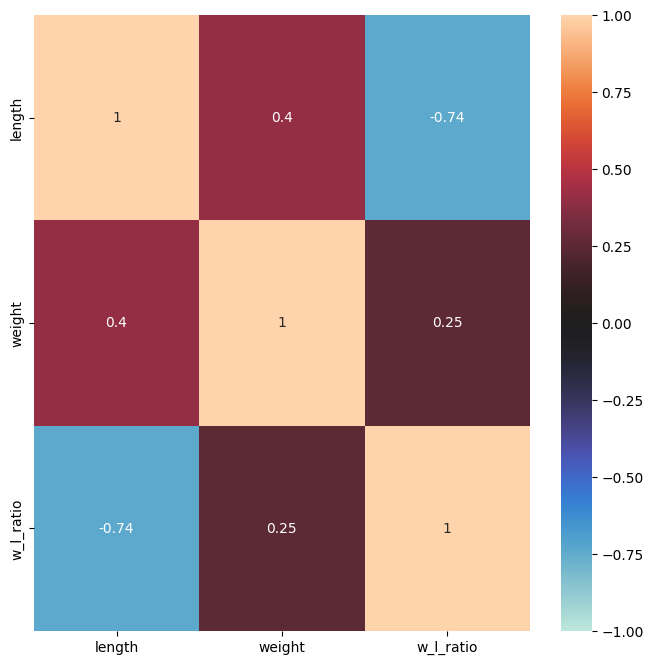

In [14]:
# correlation matrix
corr_df= df.corr(numeric_only=True)
# heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_df, center=0, vmin=-1, annot=True)
plt.show()

Clustering algorithms

In [15]:
# rescale
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

k-Means

In [16]:
# KMeans algorithm with 9 clusters and 100 iterations
kmeans = KMeans(n_clusters=9, max_iter=100)
# fit the model and predict cluster labels
y_kmeans = kmeans.fit_predict(X_scaled)

In [17]:
# inverse transformation to original scale
X_transformed = scaler.inverse_transform(X_scaled)
pd.DataFrame(X_transformed, columns=X.columns).head()

,length,weight,w_l_ratio
0,10.66,3.45,0.32
1,6.91,3.27,0.47
2,8.38,3.46,0.41
3,7.57,3.36,0.44
4,10.83,3.38,0.31


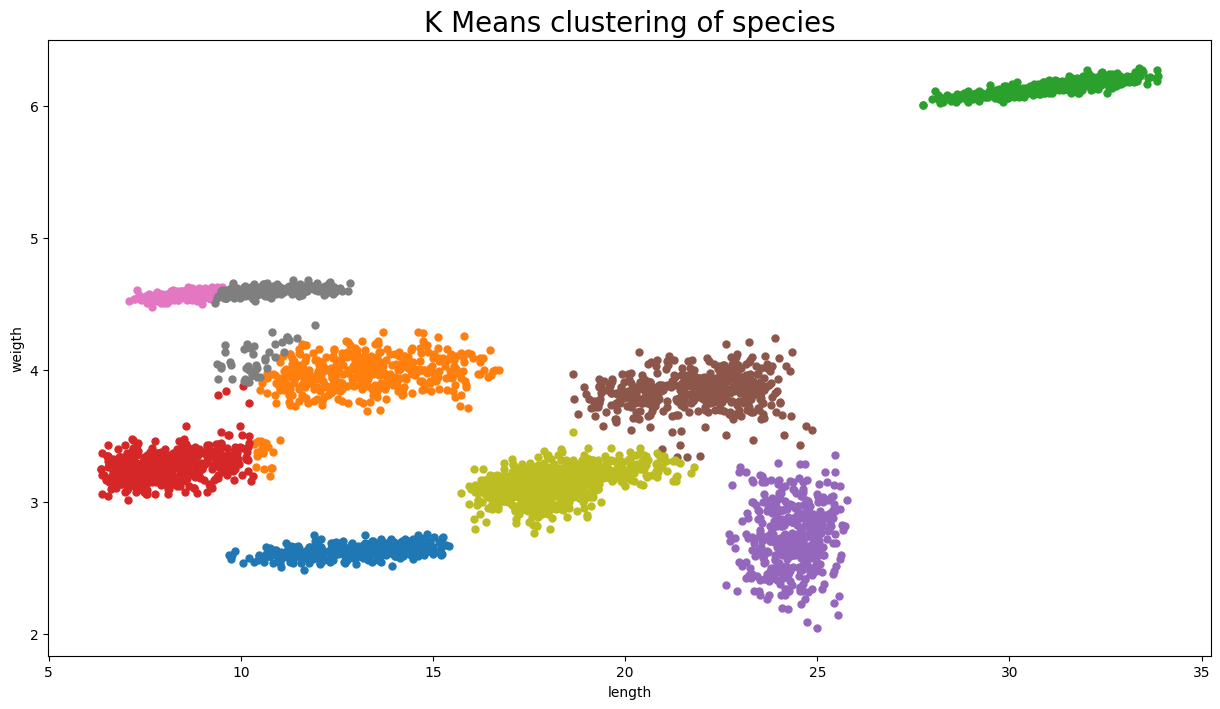

In [18]:
# visualisation
plt.figure(figsize= (15,8))

for i in range(9):
    plt.scatter(X_transformed[y_kmeans == i, 0], X_transformed[y_kmeans == i, 1], s=25)

plt.title('K Means clustering of species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

Agglomerarive clustering

In [19]:
# fit the model
agg_clustering = AgglomerativeClustering(n_clusters=9)
y_agg = agg_clustering.fit_predict(X_scaled)

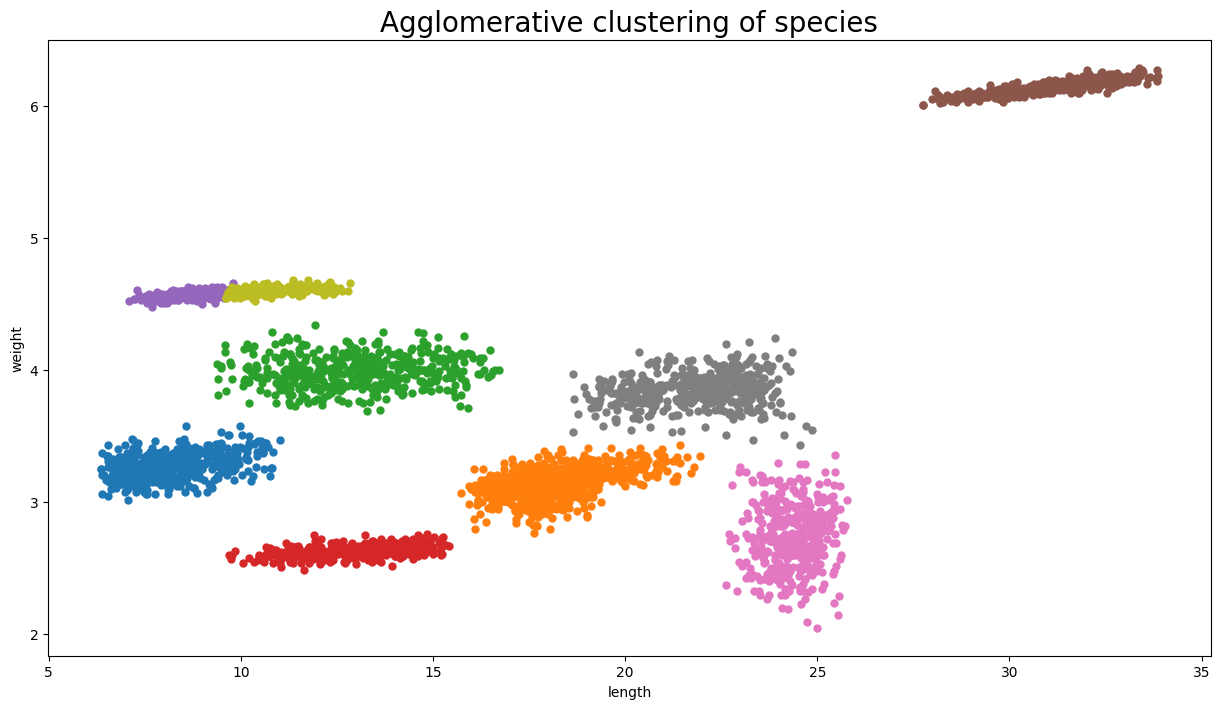

In [20]:
# visualization
plt.figure(figsize=(15,8))

for i in range(9):
    plt.scatter(X_transformed[y_agg == i, 0], X_transformed[y_agg == i, 1], s=25)

plt.title('Agglomerative clustering of species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

Gaussian mixture model

In [21]:
# fit the model
gmm = GaussianMixture(n_components=9, random_state=101)
y_gmm = gmm.fit_predict(X_scaled)

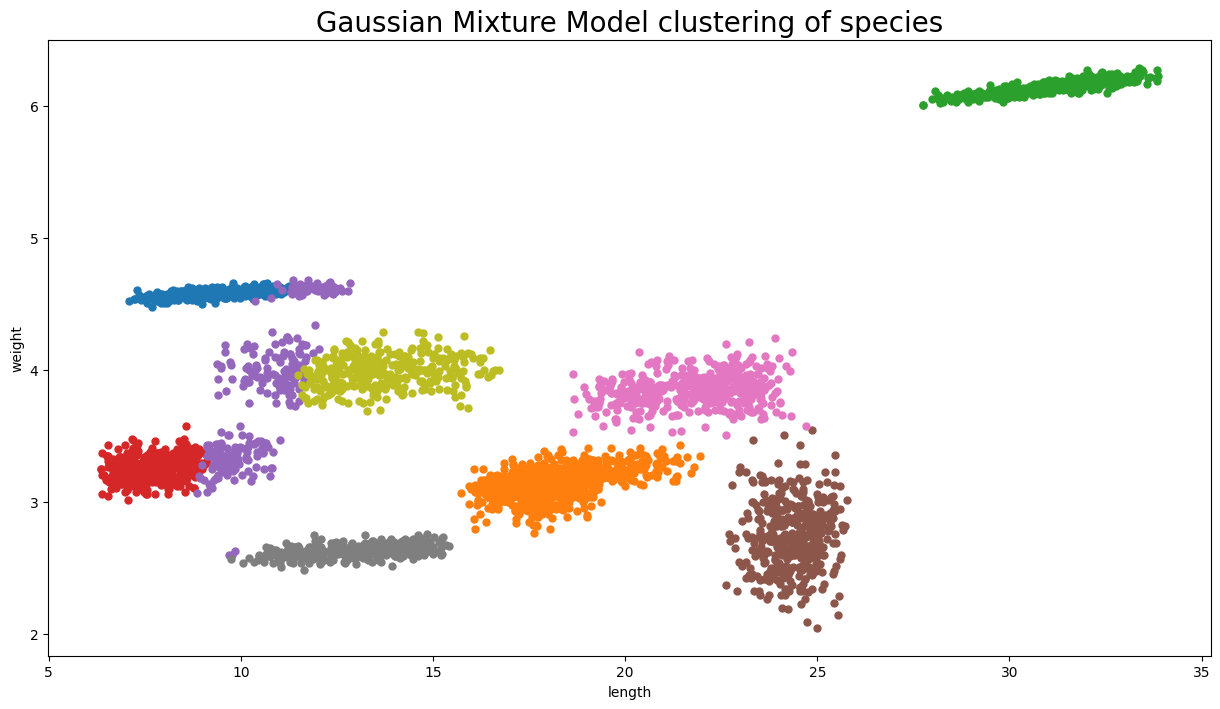

In [22]:
# visualization
plt.figure(figsize=(15,8))

for i in range(9):
    plt.scatter(X_transformed[y_gmm == i, 0], X_transformed[y_gmm == i, 1], s=25)

plt.title('Gaussian Mixture Model clustering of species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

DBSCAN

In [23]:
dbscan = DBSCAN(eps=0.03, min_samples=5)
# fit the model
y_dbscan = dbscan.fit_predict(X_scaled)

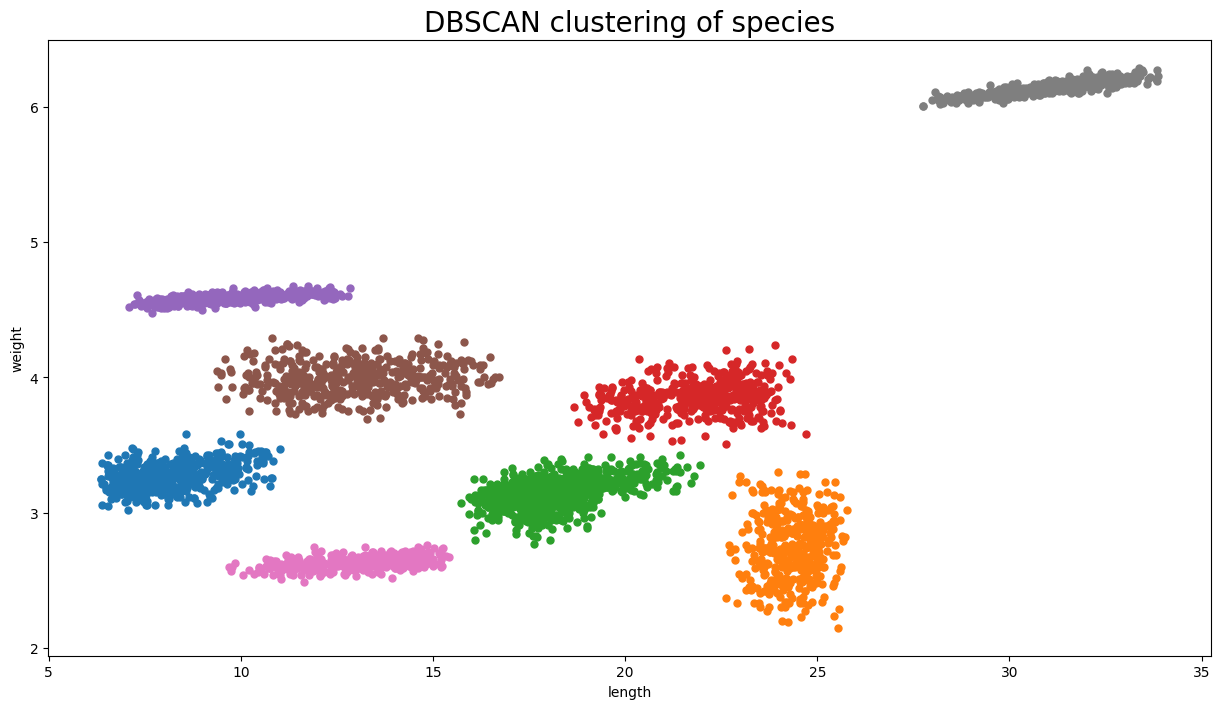

In [24]:
# visualization
plt.figure(figsize=(15,8))

for i in range(9):
    plt.scatter(X_transformed[y_dbscan == i, 0], X_transformed[y_dbscan == i, 1], s=25)

plt.title('DBSCAN clustering of species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
X.shape

(3971, 3)

In [26]:
y.shape

(3971,)

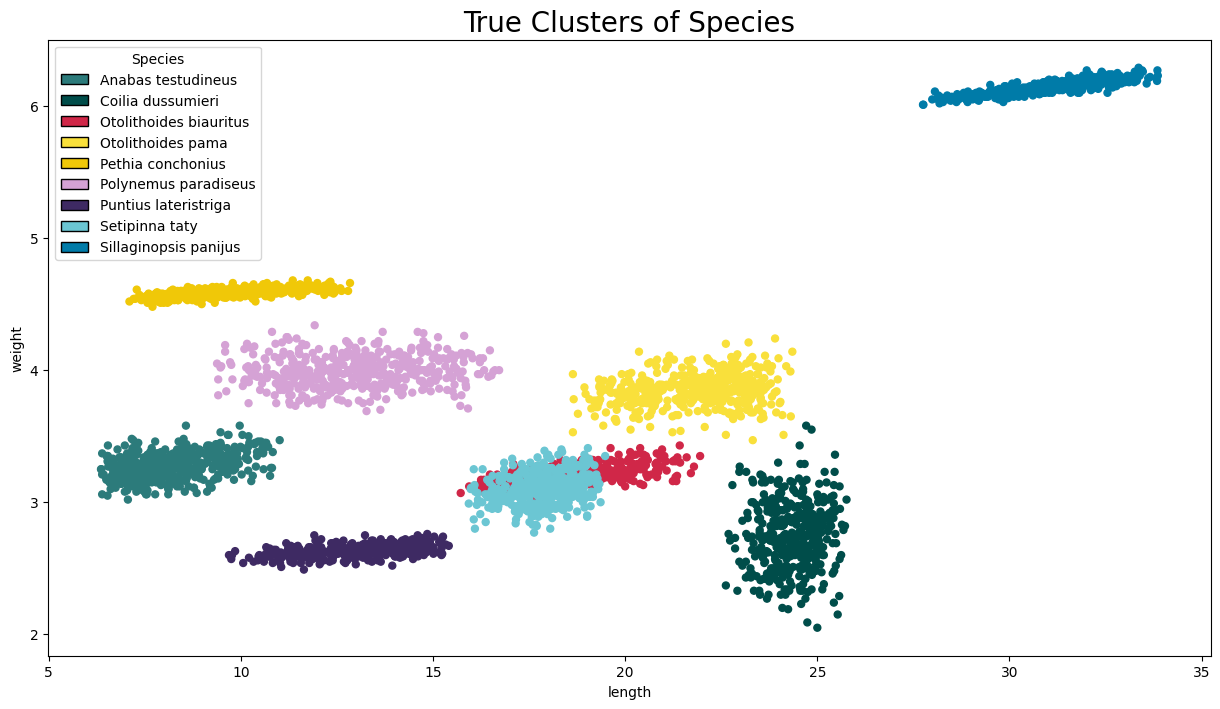

In [27]:
palette2 = ["#2C7B7B", "#004D4A", "#D02748", "#F9E03B",  "#F0C808", "#D5A2D5", "#3E2A63", "#6BC6D3", "#007BA8"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

colors = [palette2[i] for i in y_encoded]

plt.figure(figsize=(15, 8))
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=colors, s=25)

plt.title('True Clusters of Species', fontsize=20)
plt.xlabel('length')
plt.ylabel('weight')

legend_labels = label_encoder.classes_  
legend_elements = [Patch(facecolor=palette2[i], edgecolor='k', label=legend_labels[i]) for i in range(len(legend_labels))]

plt.legend(handles=legend_elements, title="Species")
plt.show()

Conclusions:
- DBSCAN performed the best but it identified 8 clusters instead of original 9.
- True values of labels show that Setipinna taty and Otolithoides biauritus are located really close to each other, that makes it difficult for any method to separate them, so no methods did it correctly.